# Исследование устойчивости статистических оценок и анализ динамики качества воздуха

Данный проект посвящен применению методов математической статистики для работы с реальными данными и проверке гипотез. 

### Структура проекта:
1. **Часть 1. Теоретическое исследование робастности оценок.** Анализ поведения среднего, медианы и усеченного среднего на распределениях с выбросами.
2. **Часть 2. Разведочный анализ данных (EDA).** Сегментация и поиск аномалий на примере физико-химических свойств вин.
3. **Часть 3. Case Study: Анализ динамики качества воздуха.** Построение доверительных интервалов через Bootstrap и сравнение периодов 2019 и 2020 годов.

In [1]:
import numpy as np
from scipy import stats as sps
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%matplotlib inline

## Часть 1. Теоретическое исследование робастности оценок

При работе с данными, содержащими аномалии, стандартное среднее арифметическое может давать смещенную оценку. В этом разделе мы сравним эффективность различных метрик центральной тенденции.

## Анализ оценок сдвига

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

1) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
np.random.seed(42)

N = 500
theta = 5

X_norm    = np.random.normal(size=N)          + theta
X_laplace = np.random.laplace(size=N)         + theta
X_cauchy  = np.random.standard_cauchy(size=N) + theta

2) Постройте график плотности распределения для всех трех распределений на одних осях.

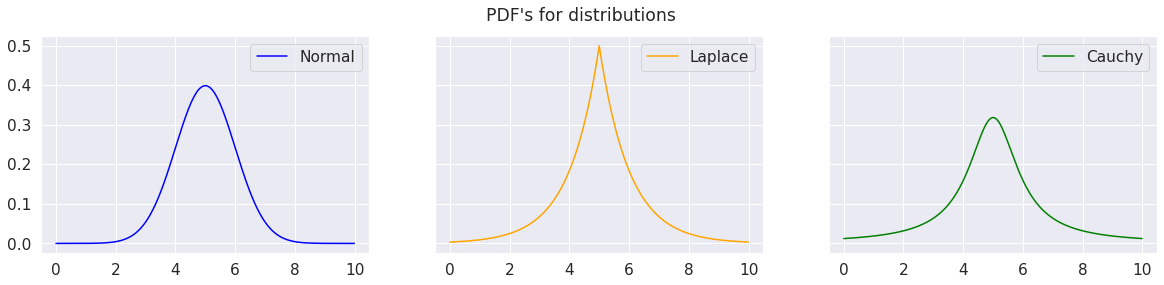

In [3]:
X = np.arange(theta-5, theta+5, 0.01)

Y_norm    = sps.norm.pdf(X-theta)
Y_laplace = sps.laplace.pdf(X-theta)
Y_cauchy  = sps.cauchy.pdf(X-theta)

fig, ax = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

ax[0].plot(X, Y_norm, color="blue", label="Normal")
ax[1].plot(X, Y_laplace, color="orange", label="Laplace")
ax[2].plot(X, Y_cauchy, color="green", label="Cauchy")

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.suptitle("PDF's for distributions", fontsize="xx-large")

plt.show()

1) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

Проще всего сравнить оценки в асимптотическом подходе:

1. Для нормального распределения $\sim \mathcal{N}(\theta, 1)$ асимптотическая дисперсия среднего равна (по ЦПТ) обычной дисперсии одного элемента выборки, т.е. 1.
<br>
Асимптотическая дисперсия медианы вычисляется по формуле:
$$
\mathbb{D} = \frac{\tfrac{1}{2}\left(1-\tfrac{1}{2}\right)}{f^2(\theta)} = \frac{1}{4\cdot \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^2} = \frac{\pi}{2}
$$

<br>
2. Для распределения Лапласа асимптотическая дисперсия среднего равна просто дисперсии распределения: $2$.
<br>
Асимптотическая дисперсия медианы находится по формуле:
$$
\mathbb{D} = \frac{1}{4\cdot f^2(\theta)} = \frac{1}{4\cdot\left(\tfrac{1}{2}\right)^2} = 1
$$

<br>
3. У распределения Коши среднего нет, а асимптотическая дисперсия медианы:
$$
\mathbb{D} = \frac{1}{4\cdot f^2(\theta)} = \frac{\pi^2}{4}
$$

Построение выборок:

In [4]:
M = int(1e4)

XX_norm    = np.random.normal(size=(M,M))          + theta
XX_laplace = np.random.laplace(size=(M,M))         + theta
XX_cauchy  = np.random.standard_cauchy(size=(M,M)) + theta

mean_norm    = np.mean(XX_norm, axis=1)
mean_laplace = np.mean(XX_laplace, axis=1)

median_norm    = np.median(XX_norm, axis=1)
median_laplace = np.median(XX_laplace, axis=1)
median_cauchy  = np.median(XX_cauchy, axis=1)

mean_norm    = (mean_norm - theta)*np.sqrt(M)
mean_laplace = (mean_laplace - theta)*np.sqrt(M)

median_norm    = (median_norm - theta)*np.sqrt(M)
median_laplace = (median_laplace - theta)*np.sqrt(M)
median_cauchy  = (median_cauchy - theta)*np.sqrt(M)

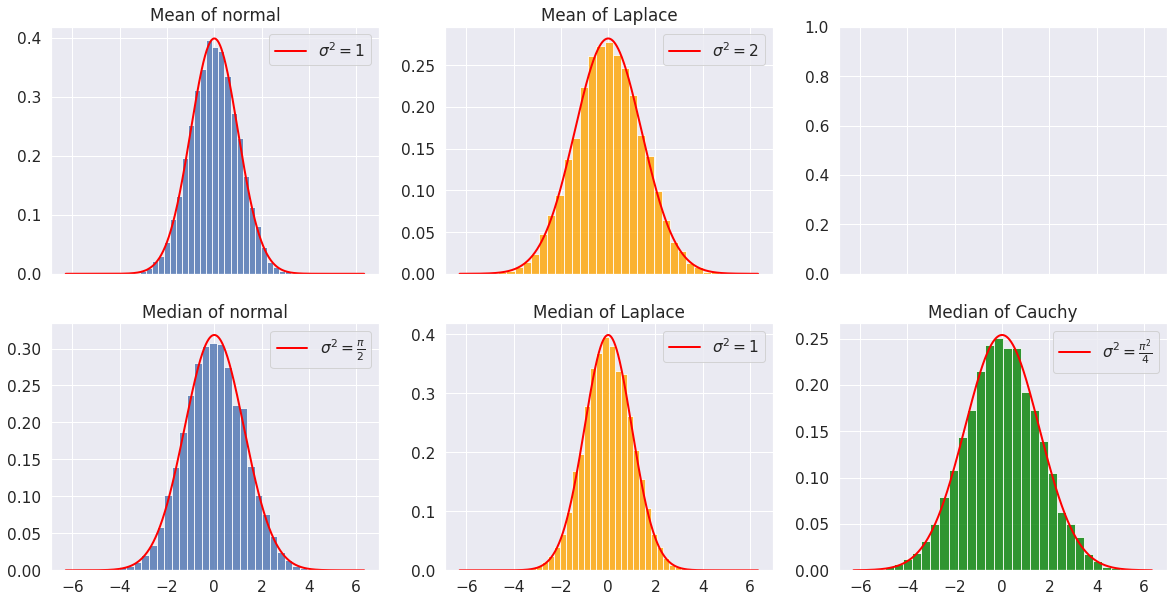

In [5]:
bins = 30

fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

ax[0,0].hist(mean_norm, bins=bins, alpha=0.8, density=True)#, label="mean normal")
ax[0,0].set_title("Mean of normal")

ax[1,0].hist(median_norm, bins=bins, alpha=0.8, density=True)#, label="median normal")
ax[1,0].set_title("Median of normal")

ax[0,1].hist(mean_laplace, bins=bins, alpha=0.8, density=True, color="orange")#, label="mean laplace")
ax[0,1].set_title("Mean of Laplace")

ax[1,1].hist(median_laplace, bins=bins, alpha=0.8, density=True, color="orange")#, label="median laplace")
ax[1,1].set_title("Median of Laplace")

ax[1,2].hist(median_cauchy, bins=bins, alpha=0.8, density=True, color="green")#, label="median cauchy")
ax[1,2].set_title("Median of Cauchy")

lims = ax[0,0].get_xlim()
X = np.arange(lims[0], lims[1], 0.01)

ax[0,0].plot(X, sps.norm(0, 1).pdf(X), color="red", linewidth=2, label=r"$\sigma^2 = 1$")
ax[0,0].legend()

ax[1,0].plot(X, sps.norm(0, (np.pi/2)**0.5).pdf(X), color="red", linewidth=2, label=r"$\sigma^2 = \frac{\pi}{2}$")
ax[1,0].legend()

ax[0,1].plot(X, sps.norm(0, 2**0.5).pdf(X), color="red", linewidth=2, label=r"$\sigma^2 = 2$")
ax[0,1].legend()

ax[1,1].plot(X, sps.norm(0, 1).pdf(X), color="red", linewidth=2, label=r"$\sigma^2 = 1$")
ax[1,1].legend()

ax[1,2].plot(X, sps.norm(0, np.pi/2).pdf(X), color="red", linewidth=2, label=r"$\sigma^2 = \frac{\pi^2}{4}$")
ax[1,2].legend()

plt.show()

Практика отлично сошлась с теорией

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [6]:
import tqdm

def tr_mean(array, alpha=0.3):
    
    size = len(array)
    return np.mean(np.sort(array)[int(alpha*size) : int((1-alpha)*size)])

alphas = [0.05, 0.1, 0.2, 0.3]

def tr_mean_ax(array, alpha=0.3):
    return np.array([tr_mean(row, alpha) for row in tqdm.tqdm(array)])

print("Computing truncated mean for Normal:")
tmean_norm = [tr_mean_ax(XX_norm, alpha) for alpha in alphas]

print()
print("Computing truncated mean for Laplace:")
tmean_laplace = [tr_mean_ax(XX_laplace, alpha) for alpha in alphas]

print()
print("Computing truncated mean for Cauchy")
tmean_cauchy = [tr_mean_ax(XX_cauchy, alpha) for alpha in alphas]

Computing truncated mean for Normal:


100%|██████████| 10000/10000 [00:04<00:00, 2316.06it/s]



Computing truncated mean for Laplace:


100%|██████████| 10000/10000 [00:04<00:00, 2288.46it/s]



Computing truncated mean for Cauchy


100%|██████████| 10000/10000 [00:04<00:00, 2448.82it/s]


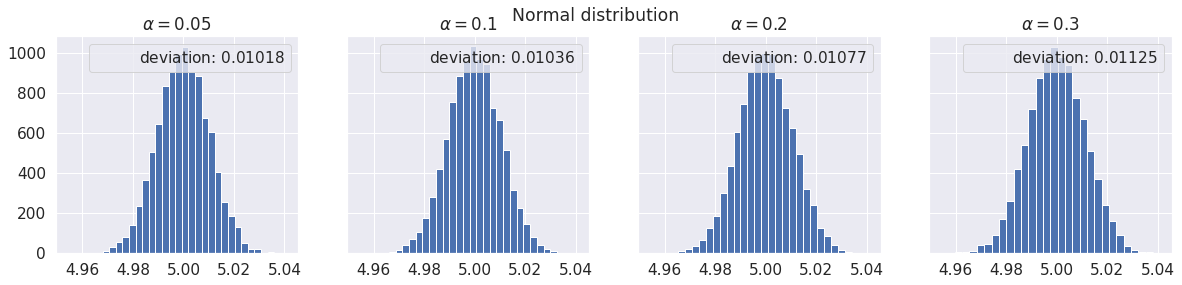

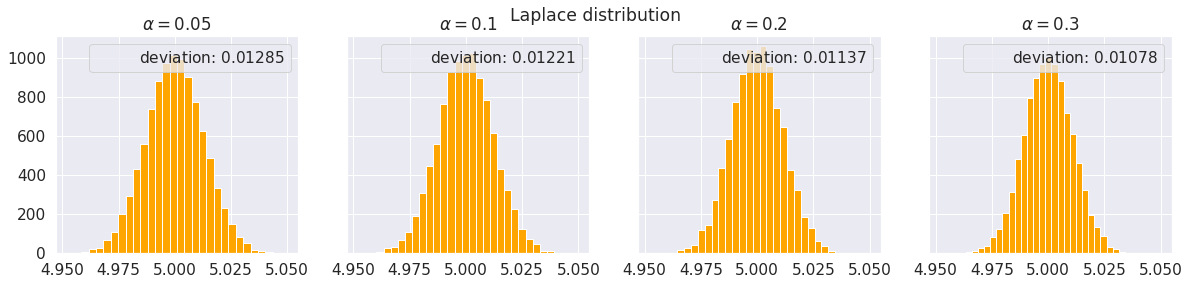

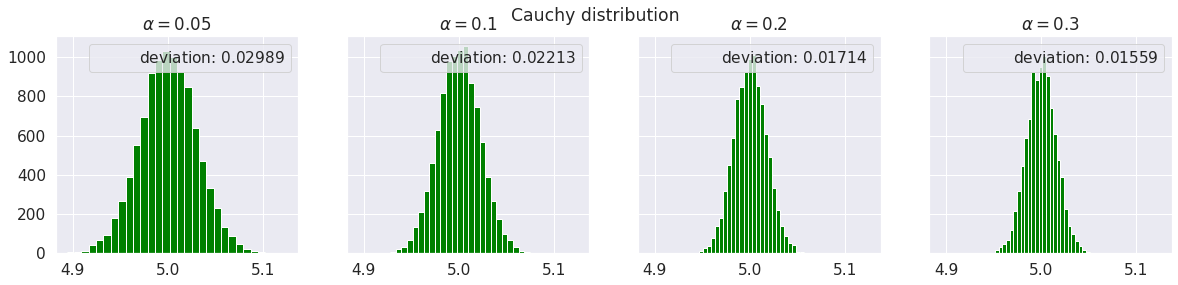

In [7]:
fig, ax = plt.subplots(1, len(alphas), figsize=(20, 4), sharex=True, sharey=True)
for i in range(len(alphas)):
    alpha = alphas[i]
    ax[i].hist(tmean_norm[i], bins=bins)
    ax[i].set_title(r"$\alpha="+str(alpha)+r"$")
    ax[i].plot((), (), label="deviation: ${:.5f}$".format(tmean_norm[i].std()), color="none")
    ax[i].legend()
plt.suptitle("Normal distribution", fontsize="xx-large")
plt.show()

fig, ax = plt.subplots(1, len(alphas), figsize=(20, 4), sharex=True, sharey=True)
for i in range(len(alphas)):
    alpha = alphas[i]
    ax[i].hist(tmean_laplace[i], bins=bins, color="orange")
    ax[i].set_title(r"$\alpha="+str(alpha)+r"$")
    ax[i].plot((), (), label="deviation: ${:.5f}$".format(tmean_laplace[i].std()), color="none")
    ax[i].legend()
plt.suptitle("Laplace distribution", fontsize="xx-large")
plt.show()

fig, ax = plt.subplots(1, len(alphas), figsize=(20, 4), sharex=True, sharey=True)
for i in range(len(alphas)):
    alpha = alphas[i]
    ax[i].hist(tmean_cauchy[i], bins=bins, color="green")
    ax[i].set_title(r"$\alpha="+str(alpha)+r"$")
    ax[i].plot((), (), label="deviation: ${:.5f}$".format(tmean_cauchy[i].std()), color="none")
    ax[i].legend()
plt.suptitle("Cauchy distribution", fontsize="xx-large")
plt.show()

У нормального распределения с ростом $\alpha$ оценка становится менее точной, в то время как у Лапласа и Коши $-$ более точной. И это не удивительно, ведь если $\alpha = 0$, мы получаем обычную оценку средним, а если $\alpha = 0.5$, получается квантильная оценка. У нормального распределения медианная хуже средней, а у Лапласа и Коши $-$ лучше. Поэтому результат не особо удивляет.

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

**Анализ сходимости оценок:**
Графики зависимости квадрата разности от размера выборки наглядно демонстрируют скорость сходимости оценок к истинному значению. Для нормального распределения среднее является наиболее эффективной оценкой, однако для распределений с выбросами (Коши, Лаплас) медиана и усеченное среднее показывают значительно меньшую ошибку при росте выборки.

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [8]:
def a_sigm(F, alpha):
    u = F.ppf(1-alpha)
    I = scipy.integrate.quad(lambda x: (x**2 * F.pdf(x)), 0, u)
    
    return 2*(I[0] + alpha*(u**2))/((1-2*alpha)**2)

In [9]:
lambdas = np.arange(0, 0.5, 0.001)[1:-1]

norm_sigm    = [a_sigm(sps.norm(), lambd) for lambd in lambdas]
laplace_sigm = [a_sigm(sps.laplace(), lambd) for lambd in lambdas]
cauchy_sigm  = [a_sigm(sps.cauchy(), lambd) for lambd in lambdas]

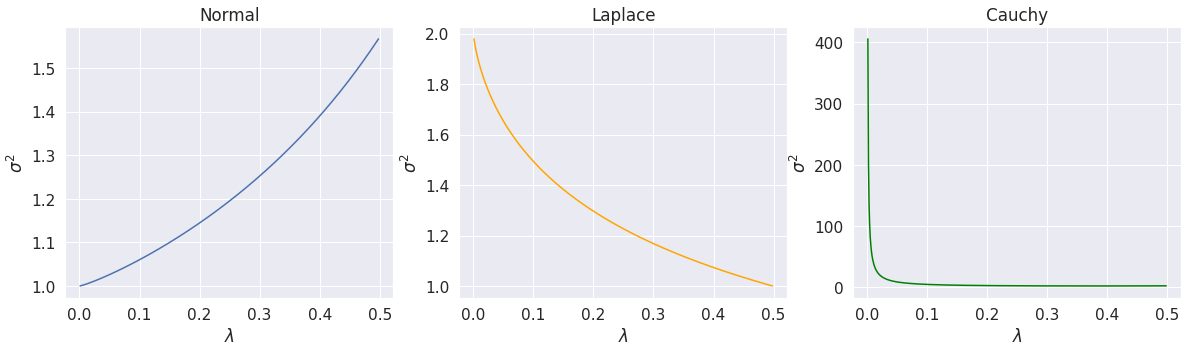

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), sharey=False)

ax[0].plot(lambdas, norm_sigm)
ax[0].set_title("Normal")

ax[1].plot(lambdas, laplace_sigm, color="orange")
ax[1].set_title("Laplace")

ax[2].plot(lambdas, cauchy_sigm, color="green")
ax[2].set_title("Cauchy")

for i in range(3):
    ax[i].set_xlabel("$\lambda$")
    ax[i].set_ylabel("$\sigma^2$")

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для заголовка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

In [11]:
alphas = np.arange(0, 0.5, 0.05)[1:-1]

print("Computing truncated mean for Normal:")
tmean_norm = [tr_mean_ax(XX_norm, alpha) for alpha in alphas]

print()
print("Computing truncated mean for Laplace:")
tmean_laplace = [tr_mean_ax(XX_laplace, alpha) for alpha in alphas]

print()
print("Computing truncated mean for Cauchy")
tmean_cauchy = [tr_mean_ax(XX_cauchy, alpha) for alpha in alphas]

Computing truncated mean for Normal:


100%|██████████| 10000/10000 [00:04<00:00, 2279.38it/s]



Computing truncated mean for Laplace:


100%|██████████| 10000/10000 [00:04<00:00, 2279.34it/s]



Computing truncated mean for Cauchy


100%|██████████| 10000/10000 [00:04<00:00, 2212.91it/s]


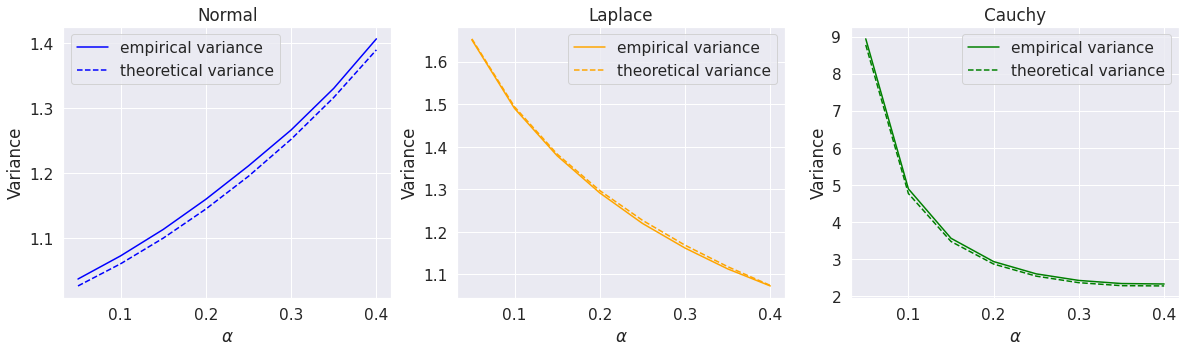

In [12]:
var_norm    = np.var(tmean_norm, axis=1)*XX_norm.shape[1]
var_laplace = np.var(tmean_laplace, axis=1)*XX_laplace.shape[1]
var_cauchy  = np.var(tmean_cauchy, axis=1)*XX_cauchy.shape[1]

norm_sigm    = [a_sigm(sps.norm(), alpha) for alpha in alphas]
laplace_sigm = [a_sigm(sps.laplace(), alpha) for alpha in alphas]
cauchy_sigm  = [a_sigm(sps.cauchy(), alpha) for alpha in alphas]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(alphas, var_norm, color="blue", label="empirical variance")
ax[0].plot(alphas, norm_sigm, linestyle='dashed', color="blue", label="theoretical variance")
ax[0].legend()
ax[0].set_title("Normal")
ax[0].set_xlabel(r"$\alpha$")
ax[0].set_ylabel("Variance")

ax[1].plot(alphas, var_laplace, color="orange", label="empirical variance")
ax[1].plot(alphas, laplace_sigm, linestyle="dashed", color="orange", label="theoretical variance")
ax[1].legend()
ax[1].set_title("Laplace")
ax[1].set_xlabel(r"$\alpha$")
ax[1].set_ylabel("Variance")

ax[2].plot(alphas, var_cauchy, color="green", label="empirical variance")
ax[2].plot(alphas, cauchy_sigm, linestyle="dashed", color="green", label="theoretical variance")
ax[2].legend()
ax[2].set_title("Cauchy")
ax[2].set_xlabel(r"$\alpha$")
ax[2].set_ylabel("Variance")
plt.show()

Теоретическое предсказание замечательно совпало с практическом. Только с нормальным распределением вышел косяк $-$ это потому, что `scipy.integrate.quad` интегрирует нормальное распределение не очень хорошо.

6) Breakdown point в статистике называется такое наибольшее число x от 0 до 100, что если изменить x% значений выборки, то значение оценки не потеряет в точности. Эквивалентно, если заменить хотя бы x+1% значений, можно получить сколь угодно плохую оценку.

Предположите, как Breakdown point зависит параметра $\alpha$.

Ответ: Очевидно, что Breakdown $-$ это $\alpha\cdot 100$

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных x% выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

In [13]:
P = 1e10

X_norm    = np.random.normal(size=M)          + theta
X_laplace = np.random.laplace(size=M)         + theta
X_cauchy  = np.random.standard_cauchy(size=M) + theta

X = np.arange(M)

step = 10
max_drop = M // 2
alphas = [0.1, 0.2, 0.3, 0.4]

noise = np.arange(0, max_drop, step)

E_norm    = [[] for i in range(len(alphas))]
E_laplace = [[] for i in range(len(alphas))]
E_cauchy  = [[] for i in range(len(alphas))]


for a in tqdm.trange(len(alphas)):
    alpha = alphas[a]
    
    for i in range(0, max_drop, step):
        I = np.random.choice(X, i, replace=False)

        norm_copy = X_norm.copy()
        norm_copy[I] = P
        E_norm[a].append(tr_mean(norm_copy, alpha))
        
        laplace_copy = X_laplace.copy()
        laplace_copy[I] = P
        E_laplace[a].append(tr_mean(laplace_copy, alpha))
        
        cauchy_copy = X_cauchy.copy()
        cauchy_copy[I] = P
        E_cauchy[a].append(tr_mean(norm_copy, alpha))

100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


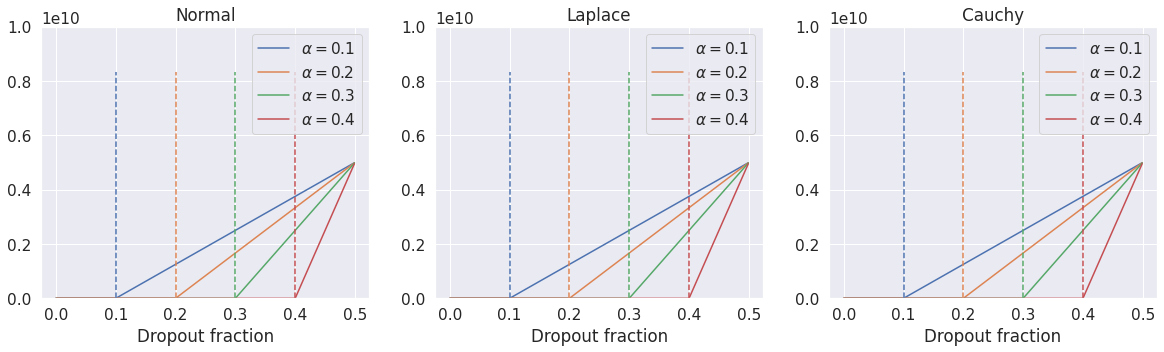

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), sharex=True)

ax[0].set_title("Normal")
ax[1].set_title("Laplace")
ax[2].set_title("Cauchy")

colors=[]

for a in range(len(alphas)):
    alpha = alphas[a]
    
    colors.append(ax[0].plot(noise/M, E_norm[a], label=r"$\alpha="+str(alpha)+r"$")[0].get_color())
    ax[1].plot(noise/M, E_laplace[a], label=r"$\alpha="+str(alpha)+r"$")
    ax[2].plot(noise/M, E_cauchy[a], label=r"$\alpha="+str(alpha)+r"$")

for i in range(len(ax)):
    xs = np.array(alphas)
    ax[i].vlines(xs, 0, 5*P/6, colors=colors, linestyles="dashed")
    ax[i].set_xlabel("Dropout fraction")
    ax[i].set_ylim((0, P))
    ax[i].legend()

Пунктиром на графиках проведены линии, на которых, в соответствии с предсказанием, оценка начинает портиться. Сплошным цветом показаны непосредственно оценки методом усеченного среднего для разных $\alpha$.

7) Для каждого распределения на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [15]:
def get_estimates(sample, start = 4000, step=1000):
    T = len(sample)
    mean   = [np.mean(sample[:k]) for k in range(start,T,step)]
    median = [np.median(sample[:k]) for k in range(start,T,step)]
    tmean  = [tr_mean(sample[:k], 0.35) for k in range(start,T,step)]
    
    return (np.arange(start,T,step), mean, median, tmean)

def get_std(XX, r, start=4000, step=200):
    mean_std   = []
    median_std = []
    tmean_std  = []
    
    for k in tqdm.trange(start, XX.shape[1], step):
        samples = XX[:, :k]
        means   = samples.mean(axis=1)
        medians = np.median(samples, axis=1)
        tmeans  = np.array([tr_mean(sample, 0.35) for sample in samples])
    
        mean_std.append(np.linalg.norm(means-r) / np.sqrt(k))
        median_std.append(np.linalg.norm(medians-r) / np.sqrt(k))
        tmean_std.append(np.linalg.norm(tmeans-r) / np.sqrt(k))
    
    mean_std   = np.array(mean_std)
    median_std = np.array(median_std)
    tmean_std  = np.array(tmean_std)
    
    return (np.arange(start, XX.shape[1], step), mean_std, median_std, tmean_std)

N_est = get_estimates(X_norm)
L_est = get_estimates(X_laplace)
C_est = get_estimates(X_cauchy)

N_std = get_std(XX_norm, theta)
L_std = get_std(XX_laplace, theta)
C_std = get_std(XX_cauchy, theta)

100%|██████████| 30/30 [01:48<00:00,  3.60s/it]


In [16]:
import pickle

def save(obj, filename="save.pkl"):
    with open(filename, "wb") as file:
        pickle.dump(obj, file, pickle.HIGHEST_PROTOCOL)

def load(filename="save.pkl"):
    with open(filename, "rb") as file:
        return pickle.load(file)

# save((N_std, L_std, C_std))
# N_std, L_std, C_std = load()

**Нормальное распределение**

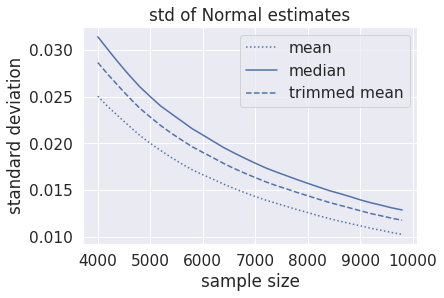

In [17]:
color = plt.plot(N_std[0], N_std[1], linestyle="dotted", label="mean")[0].get_color()
plt.plot(N_std[0], N_std[2], color=color, label="median")
plt.plot(N_std[0], N_std[3], color=color, linestyle="dashed", label="trimmed mean")
plt.legend()
plt.xlabel("sample size")
plt.ylabel("standard deviation")
plt.title("std of Normal estimates")
plt.show()

**Распределение Лапласа**

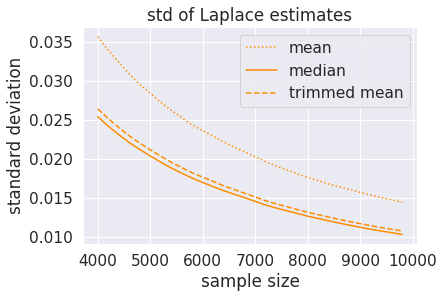

In [18]:
plt.plot(L_std[0], L_std[1], color="darkorange", linestyle="dotted", label="mean")
plt.plot(L_std[0], L_std[2], color="darkorange", label="median")
plt.plot(L_std[0], L_std[3], color="darkorange", linestyle="dashed", label="trimmed mean")
plt.legend()
plt.xlabel("sample size")
plt.ylabel("standard deviation")
plt.title("std of Laplace estimates")
plt.show()

**Распределение Коши**

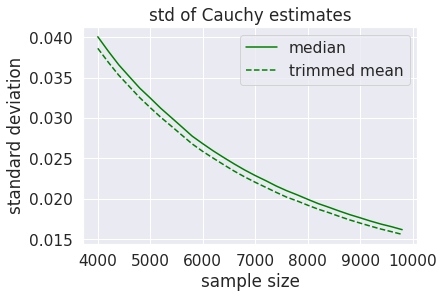

In [19]:
#plt.plot(C_est[0], C_est[1], linestyle="dotted", label="mean", color="green")
plt.plot(C_std[0], C_std[2], label="median", color="green")
plt.plot(C_std[0], C_std[3], linestyle="dashed", label="trimmed mean", color="green")
plt.legend()
plt.xlabel("sample size")
plt.ylabel("standard deviation")
plt.title("std of Cauchy estimates")
plt.show()

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

Нарисованы только графики стандартных отклонений, потому что они самые информативные. В итоге, получается, что для нормального распределения лучшая оценка $-$ среднее, потом идет усеченное среднее, потом медиана.

Для распределения Лапласа все ровно наоборот: лучшую оценку дает медиана, потом усеченное среднее, потом обычное среднее.

У распределения Коши среднее, как обычно, где-то колбасит, зато, как ни странно, усеченное среднее слегка лучше медианы. Это удивительно, потому что было бы логично ожидать, что усеченное среднее находится где-то между средним и медианой, однако на этом примере это не так.

Усеченное среднее хорошо своей робастностью $-$ оно индифферентно к выбросам. Но вот считать его довольно долго, дольше, чем медиану или обычное среднее.

## Часть 2. Разведочный анализ данных (EDA) и сегментация

На примере датасета характеристик вина исследуем распределение признаков и влияние выбросов на расчет средних показателей в разных сегментах.

In [20]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /home/daud/Desktop/statistics/winequality-red.csv
100%|████████████████████████████████████████| 101k/101k [00:00<00:00, 1.71MB/s]


In [21]:
import pandas as pd

In [22]:
data = pd.read_csv("winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [23]:
category = data["alcohol"].apply(lambda x: "low alcohol"    if x <= 10 else (
                                           "medium alcohol" if x <= 12 else
                                           "high alcohol"))
data["category"] = category
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [24]:
categories = ["low alcohol", "medium alcohol", "high alcohol"]

L = []
for cat in categories:
    sugar = data[category==cat]["residual sugar"]
    L.append([cat, sugar.mean(), sugar.median()])

wine = pd.DataFrame(L, columns=["category", "mean", "median"])
wine.set_index("category", inplace=True)
wine

,mean,median
category,,
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Чем больше в вине алкоголя, тем оно, в среднем, слаще. Кроме того, поскольку медиана не совпадает со средним, скорее всего в данных много выбросов.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

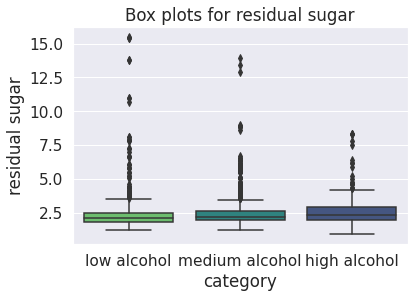

In [25]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE

sns.boxplot(data, x="category", y="residual sugar", palette=palette)
plt.title("Box plots for residual sugar")
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** И правда, выбросов много. Когда их настолько много, уже начинаешь задумываться, а выбросы ли это. Но в такой ситуации лучше использовать медиану.

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Тело ящика с усами зажато между $0.25$ и $0.75$. Каждый его ус составляет полтора интерквантильных размаха, причем ус обрывается на последнем элементе, попавшем в этот размах. Если верить `seaborn`-у, то выбросы можно посчитать так:

In [26]:
def count_dropouts(X):
    l = np.quantile(X, 0.25)
    r = np.quantile(X, 0.75)
    
    L = l - (r-l)*1.5
    R = r + (r-l)*1.5
    
    return sum((X < L) | (X > R))

for cat in categories:
    print(cat,"\t:",count_dropouts(data[category==cat]["residual sugar"]),"/",data[category==cat].shape[0])

low alcohol 	: 54 / 747
medium alcohol 	: 84 / 711
high alcohol 	: 18 / 141


Ответ: Выбросов не слишком уж много, меньше 15%, поэтому можно использовать усеченное среднее, оно как раз хорошо оценивает параметр сдвига (лучше медианы) и довольно робастное. $\alpha$ можно взять равным $0.15$.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

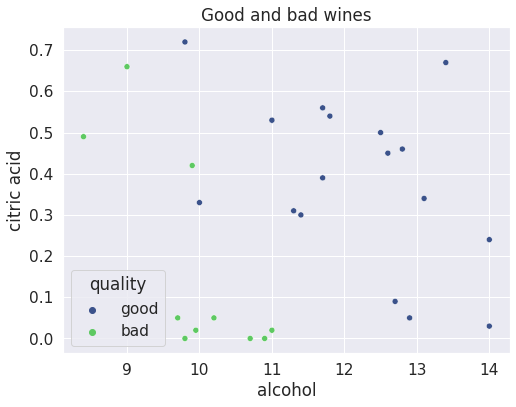

In [27]:
good_wines = data[data.quality == 8].copy()
good_wines.loc[:,"quality"] = "good"

bad_wines  = data[data.quality == 3].copy()
bad_wines.loc[:,"quality"] = "bad"

extreme_wines = pd.concat((good_wines, bad_wines))


sns.scatterplot(extreme_wines, x="alcohol", y="citric acid", hue="quality", palette=[palette[2],palette[0]])
plt.title("Good and bad wines")
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

Если вектор Гауссовский, то несложно убедиться, что ОМП для него совпадает с оценкой выборочными моментами (средним и ковариацией). Плотность распределения вектора с параметрами $\mu$ и $\Sigma$ задачется выражением
$$
\rho(\textbf{x}) = \frac{(\det \Sigma)^{-1/2}}{(\sqrt{2\pi})^k}\cdot \exp\left(-\frac{1}{2}(\textbf{x}-\mu)^T\Sigma^{-1}(\textbf{x}-\mu)\right)
$$

тогда функция правдоподобия имеет вид
$$
L(\mu,\Sigma\vert \textbf{x}_1,\dots,\textbf{x}_n) \sim \frac{n}{2}\ln\left(\det \Sigma^{-1}\right) - \frac{1}{2}\sum_{k=1}^n (\textbf{x}_k-\mu)^T\Sigma^{-1}(\textbf{x}_k-\mu)
$$

Найдем производные этого чуда:
$$
\begin{align}
\nabla_\mu L &= -\Sigma^{-1}\left(\sum_{k=1}^n (\textbf{x}_k - \mu)\right)\\[0.3cm]
\nabla_{\Sigma^{-1}} L &= \frac{n}{2}\Sigma - \frac{1}{2}\sum_{k=1}^n (\textbf{x}_k-\mu)(\textbf{x}_k-\mu)^T
\end{align}
$$

Приравнивая их к $0$, получаем
$$
\begin{align}
\mu    &= \overline{\textbf{x}} = \frac{\textbf{x}_1+\cdots + \textbf{x}_n}{n}\\[0.3cm]
\Sigma &= \frac{1}{n}\sum_{k=1}^n (\textbf{x}_k-\overline{\textbf x})(\textbf{x}_k-\overline{\textbf x})^T
\end{align}
$$

In [28]:
X = np.array(good_wines[["alcohol", "citric acid"]])
X = np.array(list(zip(*X)))

good_mean = np.mean(X, axis=1)
good_cov  = np.cov(X)

X = np.array(bad_wines[["alcohol", "citric acid"]])
X = np.array(list(zip(*X)))

bad_mean = np.mean(X, axis=1)
bad_cov  = np.cov(X)

In [29]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = (np.linspace(0, 1, cmap.N)**2)#**0.25)
    return ListedColormap(cmap_col)

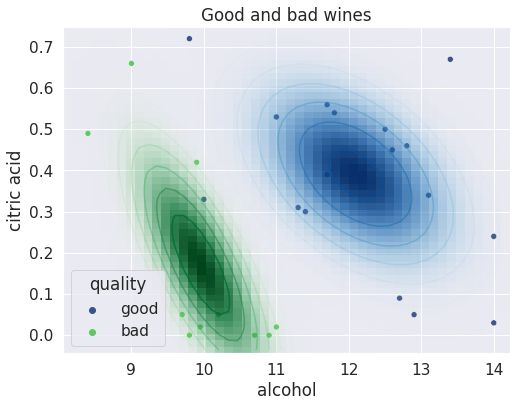

In [30]:
sns.scatterplot(extreme_wines, x="alcohol", y="citric acid", hue="quality", palette=[palette[2],palette[0]])
plt.title("Good and bad wines")

x_lims = plt.gca().get_xlim()
y_lims = plt.gca().get_ylim()

x_step = (x_lims[1]-x_lims[0])/50
y_step = (y_lims[1]-y_lims[0])/50

X_grid, Y_grid = np.meshgrid(np.arange(x_lims[0], x_lims[1], x_step),
                 np.arange(y_lims[0], y_lims[1], y_step))

good_norm = sps.multivariate_normal(good_mean, good_cov).pdf
Z = good_norm(np.dstack((X_grid,Y_grid)))

plt.pcolormesh(X_grid, Y_grid, Z, cmap=get_density_cmap("Blues"))
plt.contour(X_grid,Y_grid,Z, cmap=get_density_cmap("Blues"))

bad_norm = sps.multivariate_normal(bad_mean, bad_cov).pdf
Z = bad_norm(np.dstack((X_grid,Y_grid)))

plt.pcolormesh(X_grid, Y_grid, Z, cmap=get_density_cmap("Greens"))
plt.contour(X_grid,Y_grid,Z, cmap=get_density_cmap("Greens"))
plt.show()

Очевидно оценка _слегка_ промазала на плохих винах. Все дело в выбросах, которые оттягивают на себя ОМП (которая просто совпадает с оценкой через выборочное среднее)

Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Идея 1: использовать truncated mean вместо обычного среднего для подсчета $\mu$ и заменять выбросы на средние значения во время подсчета $\Sigma$

In [31]:
def tr_mean(array, alpha=0.3, axis=None):
    
    array = array.copy()
    
    if (axis == None):
        array = array.flatten()
        axis = 0
    
    array = np.sort(np.moveaxis(array, axis, -1), axis=-1)
    
    res = np.zeros(array.shape[:-1])
    
    size = array.shape[-1]
    
    for i in np.ndindex(array.shape[:-1]):
        res[i] = np.mean(array[i][int(alpha*size) : int((1-alpha)*size)])
    
    return res

def soft_trim(array, m, axis=0):
    array = np.moveaxis(array, axis, 0)
    
    l = np.quantile(array, 0.25, axis=0)
    r = np.quantile(array, 0.75, axis=0)
    
    for i in np.ndindex(array.shape[0]):
        ax = array[i]
        L = l - 1.5*(r-l)
        R = r + 1.5*(r-l)
        
        cond = (ax < L) | (ax > R)
        array[i] = np.where(cond, m, ax)
    
    return np.moveaxis(array, 0, axis)

In [32]:
def gaus_estimate(X, alpha=0.2):
    mean = tr_mean(X, alpha, axis=1)
    
    X = X - mean.reshape(-1,1)

    X = soft_trim(X, 0, axis=1)
    
    T = X * X.reshape(X.shape[0], 1, X.shape[1])
    cov = tr_mean(T, axis=-1)
    
    return mean, cov

In [33]:
X = np.array(good_wines[["alcohol", "citric acid"]])
X_good = np.array(list(zip(*X)))

good_tmean, good_tcov = gaus_estimate(X_good, alpha=0.1)

good_norm = sps.multivariate_normal(good_tmean, good_tcov).pdf
Z_good = good_norm(np.dstack((X_grid,Y_grid)))


X = np.array(bad_wines[["alcohol", "citric acid"]])
X_bad = np.array(list(zip(*X)))

bad_tmean, bad_tcov = gaus_estimate(X_bad, alpha=0.14)
bad_norm = sps.multivariate_normal(bad_tmean, bad_tcov).pdf

Z_bad = bad_norm(np.dstack((X_grid,Y_grid)))

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

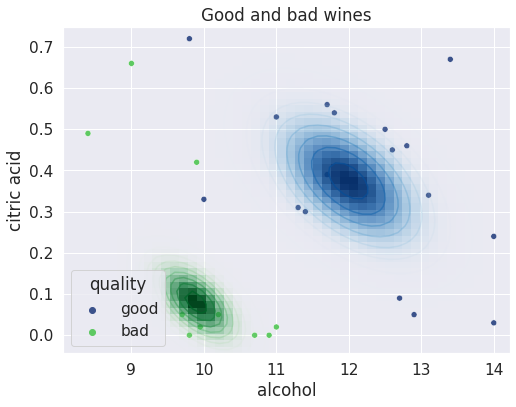

In [34]:
#YOUR CODE GOES HERE

sns.scatterplot(extreme_wines, x="alcohol", y="citric acid", hue="quality", palette=[palette[2],palette[0]])
plt.title("Good and bad wines")

plt.pcolormesh(X_grid, Y_grid, Z_bad, cmap=get_density_cmap("Greens"))
(plt.contour(X_grid, Y_grid, Z_bad, levels=10, cmap=get_density_cmap("Greens")))

plt.pcolormesh(X_grid, Y_grid, Z_good, cmap=get_density_cmap("Blues"))
plt.contour(X_grid, Y_grid, Z_good, levels=10, cmap=get_density_cmap("Blues"))
plt.show()

Выглядит этот график, откровенно говоря, так себе. Поэтому попробуем найти ещё одну оценку:

Идея 2. Как подсказывает наш гримуар робастных оценок,
$$
\text{cov}\, (X,Y) = \frac{1}{4ab}\big(\text{cov}\,(aX+bY,aX+bY) - \text{cov}\,(aX-bY,aX-bY)\big)
$$. Пусть у нас есть $S(X)$ $-$ робастная оценка стандартного отклонения нормального распределения. Тогда если взять $a=b=1$, мы получим робастную оценку
$$
\text{cov} \,(X,Y) \approx \frac{1}{4}\big(S(X+Y)^2 - S(X-Y)^2\big)
$$

В качестве робастной оценки возьмем интерквантильное расстояние.

In [35]:
norm = sps.norm()

def scale_estimate(X, alpha=0.2, beta=0.8):
    
    l = np.quantile(X, alpha)
    r = np.quantile(X, beta)
    
    return (r-l) / (norm.ppf(beta) - norm.ppf(alpha))

def robust_covariance(X, alpha=0.25):
    r = np.zeros((X.shape[0], X.shape[0]))
    
    for i in range(X.shape[0]):
        r[i][i] = scale_estimate(X[i], alpha)**2
        for j in range(i):
            r[i][j] = r[j][i] = 0.25*(scale_estimate(X[i]+X[j], alpha)**2 -
                                      scale_estimate(X[i]-X[j], alpha)**2)
    return r

def robust_norm(X, alpha=0.10, beta=0.25):
    return tr_mean(X, alpha=alpha, axis=1), robust_covariance(X, alpha=beta)

In [36]:
good_rmean, good_rcov = robust_norm(X_good, alpha=0.2)
bad_rmean, bad_rcov = robust_norm(X_bad, alpha=0.3, beta=0.1)

try:
    assert(np.all(np.linalg.eigvals(good_rcov) > 0))
    assert(np.all(np.linalg.eigvals(bad_rcov) > 0))

    good_norm = sps.multivariate_normal(good_rmean, good_rcov).pdf
    Z_good = good_norm(np.dstack((X_grid,Y_grid)))

    bad_norm = sps.multivariate_normal(bad_rmean, bad_rcov).pdf
    Z_bad = bad_norm(np.dstack((X_grid,Y_grid)))

except:
    print("Bad estimate:(")

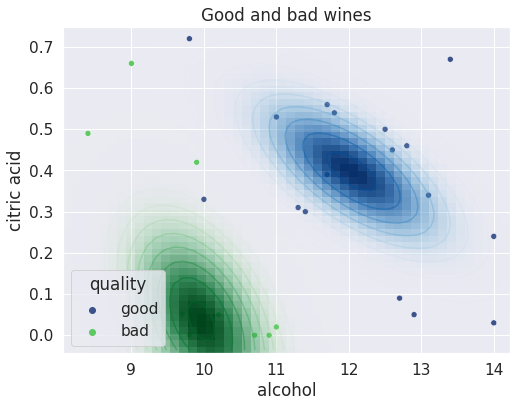

In [37]:
sns.scatterplot(extreme_wines, x="alcohol", y="citric acid", hue="quality", palette=[palette[2],palette[0]])
plt.title("Good and bad wines")

plt.pcolormesh(X_grid, Y_grid, Z_bad, cmap=get_density_cmap("Greens"))
(plt.contour(X_grid, Y_grid, Z_bad, levels=10, cmap=get_density_cmap("Greens")))

plt.pcolormesh(X_grid, Y_grid, Z_good, cmap=get_density_cmap("Blues"))
plt.contour(X_grid, Y_grid, Z_good, levels=10, cmap=get_density_cmap("Blues"))

plt.show()

И попробуем ещё одну оценочку:

Идея 3. Из того же гримуара, есть робастная оценка матрицы кореляций, которая оценивает ковариацию [ковариацией порядковых номеров элементов в векторах](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

In [38]:
def rank_estimate(X, alpha=0.1, beta=0.05):
    Y = np.array([np.argsort(np.argsort(x)) for x in X])
    r = np.corrcoef(Y)
    
    V = np.array([scale_estimate(x, alpha=beta) for x in X ]).reshape((-1,1))
    var = V.transpose() * r * V
    
    return tr_mean(X, axis=1), var

In [39]:
good_rkmean, good_rkcov = rank_estimate(X_good, alpha=0.1, beta=0.1)
bad_rkmean, bad_rkcov = rank_estimate(X_bad, alpha=0.1, beta=0.1)

good_norm = sps.multivariate_normal(good_rkmean, good_rkcov).pdf
Z_good = good_norm(np.dstack((X_grid,Y_grid)))

bad_norm = sps.multivariate_normal(bad_rkmean, bad_rkcov).pdf
Z_bad = bad_norm(np.dstack((X_grid,Y_grid)))

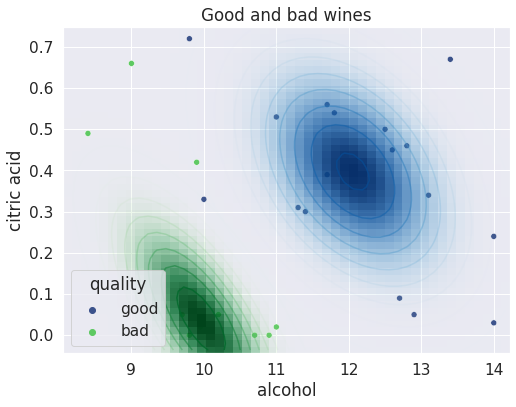

In [40]:
sns.scatterplot(extreme_wines, x="alcohol", y="citric acid", hue="quality", palette=[palette[2],palette[0]])
plt.title("Good and bad wines")

plt.pcolormesh(X_grid, Y_grid, Z_bad, cmap=get_density_cmap("Greens"))
(plt.contour(X_grid, Y_grid, Z_bad, levels=10, cmap=get_density_cmap("Greens")))

plt.pcolormesh(X_grid, Y_grid, Z_good, cmap=get_density_cmap("Blues"))
plt.contour(X_grid, Y_grid, Z_good, levels=10, cmap=get_density_cmap("Blues"))

plt.plot()

plt.show()

На мой взгляд, последняя оценка выглядит самой убедительной $-$ гауссовские эллипсы покрывают большую часть точек.

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на графике выше?

**Ответ:** более качественное вино как правило содержит больше алкоголя, а так же больше лимонной кислоты. Но при этом чем больше оно содержит алкоголя, тем меньше в нем кислоты и наоборот.

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, в который истинное значение параметра попадает с высокой вероятностью.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [41]:
alpha = 0.95

np.random.seed(42)

def draw_confidence_interval(X, est, low, high):
    E = []
    L = []
    H = []
    
    for n in range(1, len(X)+1):
        L.append(low(X[:n]))
        H.append(high(X[:n]))
    
    if est is not None:
        for n in range(1, len(X)+1):
            E.append(est(X[:n]))
    
    x = np.arange(1, len(X)+1)
    
    plt.rcParams["figure.figsize"] = (6,4)
    plt.fill_between(x, L, H, color="red", alpha=0.5, label="Confidence interval")
    
    if (len(E) > 0):
        plt.plot(x, E, color="green", label="Estimate", linewidth=2)
    
    plt.legend()
    plt.xlabel("Sample size")
    plt.ylabel(r"$\hat{\theta}$")

def check(XX, theta, low, high):
    L = np.array([low(X) for X in XX])
    H = np.array([high(X) for X in XX])

    return np.sum((theta >= L) & (theta <= H)) / XX.shape[0]

#### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

$X_{(n)}$ для $n$-элементной выборки имеет функцию распределения $F(x) = x^n/\theta^n$. Рассмотрим центральную статистику $G(X,\theta) = X_{(n)}/\theta$. Её функция распределения $-$ $F_G(x) = x^n$, $x\in [0,1]$ не зависит от $\theta$. Пусть $z_{p_1}$ и $z_{p_2}$ $-$ квантили этого распределения, а $p_2-p_1$ равно $\alpha$. Рассмотрим $T_1(X), T_2(X)$ такие, что $G(X, T_1(X)) = z_{p_1}$, а $G(X, T_2(X)) = z_{p_2}$.

В этом случае,
$$
P\left(T_1(X) < \theta < T_2(X)\right) = P(G(X,T_1(X)) > G(X,\theta) > G(X,T_2(X))) = P(z_{p_1} > G(X,\theta) > x_{p_2}) = p_2 - p_1
$$

Возьмем $z_{p_2} = (1-\alpha)^{1/n}$ и $z_{p_1} = 1$. Тогда 
$$
G(X,T_1(X)) = X_{(n)}/T_1(X) = 1 \Rightarrow T_1(x) = X_{(n)}\\
G(X,T_2(X)) = X_{(n)}/T_2(X) = (1-\alpha)^{1/n} \Rightarrow T_2(x) = \frac{X_{(n)}}{(1-\alpha)^{1/n}}
$$

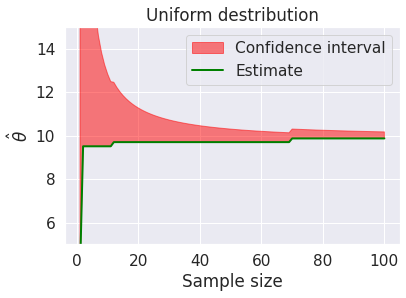

Interval hits: 0.956


In [42]:
theta = 10

X = np.random.uniform(size=100)*theta

est  = lambda t: np.max(t)
low  = lambda t: est(t)
high = lambda t: est(t) / ((1-alpha)**(1/len(t)))

draw_confidence_interval(X, est, low, high)
plt.title("Uniform destribution")
plt.ylim(5, 15)
plt.show()

XX = np.random.uniform(size=(1000,100))*theta
print("Interval hits: {:.3f}".format(check(XX, theta, low, high)))

#### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Пусть $M(X)$ $-$ выборочная медиана. Тогда в качестве центральной статистики рассмотрим $M(X)-\theta$ $-$ эта величина распределена как выборочная медиана распределения Коши. Искать квантили распределения Коши $-$ та ещё задачка, зато мы знаем, что асимптотически $\sqrt{n}M$ распределено нормально с дисперсией
$$
\sigma^2 = \frac{\pi}{4}
$$

пусть $z_{p_2}$ $-$ $(1-\alpha)/2$-квантиль, а $z_{p_1}$ $-$ $(1+\alpha)/2$-квантиль $\mathcal{N}(0,\frac{\pi}{4})$. Тогда асимптотический доверительный интервал $-$ $[M(X)-z_{p_1}/\sqrt{n}, M(X)-z_{p_2}/\sqrt{n}]$. Чтобы получить честный (но не точный) доверительный интервал, раздуем его в $2$ раза:
$$
[M(X)-2z_{p_1}/\sqrt{n}, M(X)-2z_{p_2}/\sqrt{n}]
$$

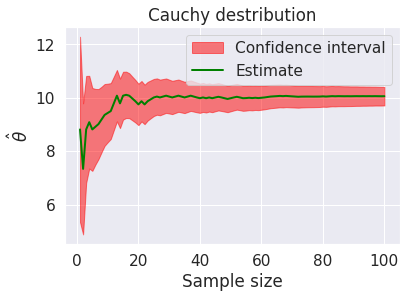

Interval hits: 0.969


In [43]:
theta = 10

cnorm = sps.norm(0, np.sqrt(np.pi)/2)
z1 = cnorm.ppf((1+alpha)/2)
z2 = cnorm.ppf((1-alpha)/2)

X = np.random.standard_cauchy(size=100)+theta

est  = lambda t: np.median(t)
low  = lambda t: est(t)-2*z1/np.sqrt(len(t))
high = lambda t: est(t)-2*z2/np.sqrt(len(t))

draw_confidence_interval(X, est, low, high)
plt.title("Cauchy destribution")
plt.show()

XX = np.random.standard_cauchy(size=(1000,100))+theta
print("Interval hits: {:.3f}".format(check(XX, theta, low, high)))

#### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Распределение пуассона дискретно и задается обобщенной плотностью
$$
f(k) = \frac{\lambda^k}{k!}e^{-\lambda}
$$

Тут снова найдем доверительный интервал асимптотически. $\sqrt{n}(\frac{\overline{X}}{\lambda}-1)$ $-$ асимптотически-нормальная величина с распределением $\mathcal{N}(0,1)$, поэтому, если взять 
$$
G(X,\lambda) = \sqrt{n}\left(\frac{\overline{X}}{\lambda}-1\right)
$$
и взять у него $z_{p_2}$ $(1-\alpha)/2$-квантилью, а $z_{p_1}$ $-$ $(1+\alpha)/2$-квантилью, то
$$
\lambda_1 = \frac{\overline{X}}{(z_{p_1}/\sqrt{n})+1}\\
\lambda_2 = \frac{\overline{X}}{(z_{p_2}/\sqrt{n})+1}
$$

будут границами асимптотического доверительного интервала. Для неассимптотического доверительного интервала подойдет этот интервал с несколько большим $\alpha$.

Другая оценка доверительного интервала играет на том, что $n\cdot\overline{X}$ $-$ Пуассоновская величина с параметром $n\lambda$. Для неё можно написать неравенство Чебышева:
$$
P(|\overline{X} - \mathbb{E}(\overline{X})| \ge \delta) \le \frac{\mathbb{D}(\overline{X})}{\delta^2} \Leftrightarrow\\
P(|\overline{X} - \lambda| \ge \delta) \le \frac{\lambda}{n\cdot\delta^2}
$$

Возьмем
$$
\delta = \sqrt{\frac{\lambda}{(1-\alpha)\cdot n}}
$$

тогда 
$$
\begin{align}
P\left(|\overline{X}-\lambda|\ge \sqrt{\frac{\lambda}{(1-\alpha)\cdot n}}\right) \le (1-\alpha) &\Leftrightarrow
P\left(\overline{X}^2+\lambda^2 - 2\lambda\cdot\left(\overline{X}+\frac{1}{(2-2\alpha)\cdot n}\right)\ge 0\right) \le (1-\alpha) \Leftrightarrow\\
&\Leftrightarrow P\left(\left(\overline{X}-\frac{1}{(2-2\alpha)\cdot n} - \lambda\right)^2\ge \frac{1}{(2-2\alpha)^2\cdot n^2} + \frac{\overline{X}}{(1-\alpha)\cdot n}\right) \le (1-\alpha)
\end{align}
$$

То есть границы доверительного интервала задаются так:
$$
u_{1,2} = \overline{X}-\frac{1}{(2-2\alpha)\cdot n} \pm \sqrt{\frac{1}{(2-2\alpha)^2\cdot n^2} + \frac{\overline{X}}{(1-\alpha)\cdot n}}
$$

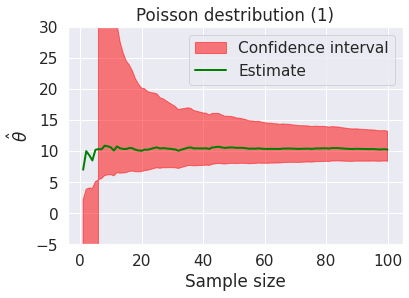

Interval hits: 1.000


In [44]:
beta = (1+alpha)/2
norm = sps.norm()

z1 = norm.ppf((1+beta)/2)
z2 = norm.ppf((1-beta)/2)

theta = 10

X = np.random.poisson(theta, size=100)

est  = lambda t: np.mean(t)
low  = lambda t: est(t)/(z1/np.sqrt(len(t))+1)
high = lambda t: est(t)/(z2/np.sqrt(len(t))+1)

draw_confidence_interval(X, est, low, high)
plt.title("Poisson destribution (1)")
plt.ylim((-5, 30))
plt.show()

XX = np.random.poisson(theta, size=(1000,100))
print("Interval hits: {:.3f}".format(check(XX, theta, low, high)))

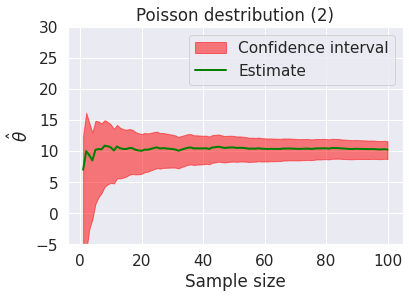

Interval hits: 1.000


In [45]:
est = lambda t: np.mean(t)

def f(t):
    return est(t) - 1/((2-2*alpha)*len(t))

def g(t):
    n = len(t)
    
    r = 1/((2-2*alpha)**2 * n**2) + est(t)/((1-alpha)*n)
    return r**0.5
    
low  = lambda t: f(t)-g(t)
high = lambda t: f(t)+g(t)

draw_confidence_interval(X, est, low, high)
plt.title("Poisson destribution (2)")
plt.ylim((-5, 30))
plt.show()

print("Interval hits: {:.3f}".format(check(XX, theta, low, high)))

Оба способа дали перелёт по точности доверительного интервала.

#### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Найдем центральную статистику для $\Gamma$-распределения. В качестве таковой можно взять, например, такую величину ($F$ $-$ это функция распределения для $\Gamma$) $L(\textbf{X}) = \ln (F(X_1))+\, \cdots\, + \ln (F(X_n))$. Тогда $G(X,\theta)$ распределена как сумма логарифмов n независимых $U(0,1)$-величин.

Функция распределения такой величины равна $$
F(x) = P(\ln u < x) = P(u < e^x) = \begin{cases}
e^x, x < 0\\
1, x\ge 0
\end{cases}
$$

а плотность
$$
f(x) = F'(x) = e^x\cdot \mathbb{1}(x < 0)
$$

Посчитаем у таких величин матожидание и дисперсию:

$$
\mathbb{E}l = \int_{-\infty}^0 x\cdot e^x\,dx = x\cdot e^x\bigg\vert_{-\infty}^0 - \int_{-\infty}^0 e^x\,dx = -1\\
\mathbb{E}l^2 = \int_{-\infty}^0 x^2\cdot e^x\,dx = x^2\cdot e^x \bigg\vert_{-\infty}^0 - 2\int_{-\infty}^0 x\cdot e^x\,dx = 2\\
\mathbb{D}l = \mathbb{E}l^2 - (\mathbb{E}l)^2 = 1
$$

Получается, что $\frac{\sum_{k=1}^n \log\Gamma(X_k/t)+1}{\sqrt{n}} \overset{d}\longrightarrow \mathcal{N}(0,1)$. Тогда асимптотический доверительный интервал можно найти при помощи, например, бинпоиска.

In [46]:
gamma = sps.gamma(3).cdf

def G(X, t):
    r = np.sum(np.log(gamma(X/t))+1)/np.sqrt(X.size)
    return r

def find(X, p, l = 1e-9, r=1e3, eps=1e-5):
    while r-l > eps:
        m = (r+l)/2
        
        if (G(X, m) >= p):
            l = m
        else:
            r = m
        
    return (l+r)/2

beta = (1+alpha)/2

l = sps.norm().ppf((1+beta)/2)
r = sps.norm().ppf((1-beta)/2)

low  = lambda t: find(t, l)
high = lambda t: find(t, r)
est  = lambda t: (high(t) + low(t))/2

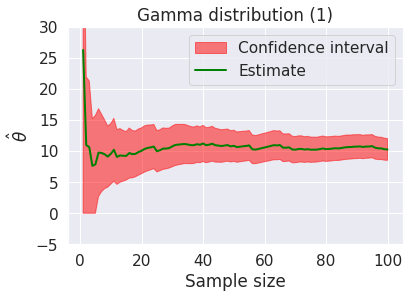

100%|██████████| 1000/1000 [00:03<00:00, 258.01it/s]

Interval hits: 0.979


In [47]:
import tqdm

X = np.random.gamma(3,theta, size=100)

draw_confidence_interval(X, est, low, high)
plt.title("Gamma distribution (1)")
plt.ylim((-5, 30))
plt.show()

XX = np.random.gamma(3, theta, size=(1000, 100))

hits = 0
for x in tqdm.tqdm(XX):
    hits += int ((low(x) <= theta) and (high(x) >= theta))

print("Interval hits: {:.3f}".format(hits/XX.shape[0]))

Но этот интервал ужасно долго считается. Другой способ найти доверительный интервал $-$ через оценку $\overline{X}$, ведь $nX$ имеет $\Gamma$-распределение с параметрами $n\lambda, \theta$, а потому
$$
\frac{n\cdot\overline{X}}{\theta} \sim \Gamma(n\lambda, 1)
$$

Если $u_{p_1}$ и $u_{p_2}$ $-$ квантили $Gamma(n\lambda, 1)$ такие, что $p_2-p_1 = \alpha$, то
$[(n\overline{X})/u_{p_1}, (n\overline{X})/u_{p_2}]$

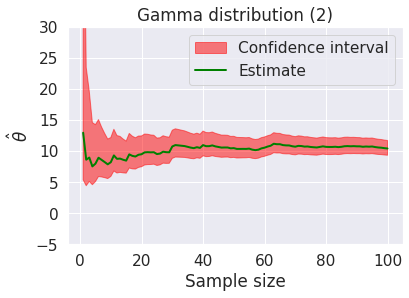

Interval hits: 0.952


In [48]:
est = lambda t: np.mean(t) / 3
low = lambda t: np.sum(t) / sps.gamma(len(t)*3).ppf((1+alpha)/2)
high = lambda t: np.sum(t) / sps.gamma(len(t)*3).ppf((1-alpha)/2)

draw_confidence_interval(X, est, low, high)
plt.title("Gamma distribution (2)")
plt.ylim((-5, 30))
plt.show()

print("Interval hits: {:.3f}".format(check(XX, theta, low, high)))

Вывод: самый узкий доверительный интервал в первом случае, для равномерного случайного распределения. Остальные убывают более-менее со схожей скоростью $O(n^{-1/2})$. Требуемая точность в `0.95` достигалась на всех интервалах, хотя некоторые здорово перевыполняли план. От доверительного интервала, конечно, хотелось бы добиться как можно меньшего размера, потому что он в первую очередь нужен, чтобы оценить параметр. А если окно слишком широкое, зачем такая оценка вообще нужна?

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Пусть $\overline{X}$ $-$ выборочное среднее, $s^2$ $-$ выборочная дисперсия. Заметим, что $\overline{X}$ и $s^2$ независимы:
$$
\overline{X} = \frac{X_1+\cdots+X_n}{n}\\
s^2 = \frac{(X_1-\overline{X})^2 + \cdots +(X_n-\overline{X})^2}{n-1}
$$

Заметим, что если $X\sim \mathcal{N}(a, \sigma^2)$, то $(X_1,\dots,X_n,\overline{X})$ $-$ Гауссовский вектор с матрицей ковариации
$$
\begin{pmatrix}
\sigma^2 & 0 & \cdots & 0 & \frac{\sigma^2}{n}\\
0 & \sigma^2 & \cdots & 0 & \frac{\sigma^2}{n}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & \cdots & \sigma^2 & \frac{\sigma^2}{n}\\
\frac{\sigma^2}{n} & \frac{\sigma^2}{n} & \cdots & \frac{\sigma^2}{n} & \frac{\sigma^2}{n}
\end{pmatrix}
$$

Поэтому условное распределение $(X_1,\dots, X_n\vert \overline{X})$ при условии $\overline{X}$ $-$ Гауссовский вектор с матрицей ковариации
$$
\begin{pmatrix}
\sigma^2 & 0 & \cdots & 0\\
0 & \sigma^2 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \sigma^2
\end{pmatrix} - \begin{pmatrix}
\frac{\sigma^2}{n} \\ \frac{\sigma^2}{n} \\ \vdots \\ \frac{\sigma^2}{n}\end{pmatrix}\begin{pmatrix}
\frac{n}{\sigma^2}\end{pmatrix}\begin{pmatrix}
\frac{\sigma^2}{n}&
\frac{\sigma^2}{n}&
\cdots&
\frac{\sigma^2}{n}
\end{pmatrix} = \begin{pmatrix}
\frac{n-1}{n}\sigma^2 & -\frac{\sigma^2}{n} & \cdots &-\frac{\sigma^2}{n}\\
-\frac{\sigma^2}{n} & \frac{n-1}{n}\sigma^2 & \cdots &-\frac{\sigma^2}{n}\\
\vdots & \vdots & \ddots & \vdots\\
-\frac{\sigma^2}{n} & -\frac{\sigma^2}{n} & \cdots & \frac{n-1}{n}\sigma^2
\end{pmatrix}
$$

Заметим, что
$$
\begin{pmatrix}
\frac{n-1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n}\\
-\frac{1}{n} & \frac{n-1}{n} & \cdots & -\frac{1}{n}\\
\vdots & \vdots & \ddots & \vdots\\
-\frac{1}{n} & -\frac{1}{n} & \cdots & \frac{n-1}{n}
\end{pmatrix} = \begin{pmatrix}
\frac{n-1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n}\\
-\frac{1}{n} & \frac{n-1}{n} & \cdots & -\frac{1}{n}\\
\vdots & \vdots & \ddots & \vdots\\
-\frac{1}{n} & -\frac{1}{n} & \cdots & \frac{n-1}{n}
\end{pmatrix}\cdot \textbf{E}\cdot\begin{pmatrix}
\frac{n-1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n}\\
-\frac{1}{n} & \frac{n-1}{n} & \cdots & -\frac{1}{n}\\
\vdots & \vdots & \ddots & \vdots\\
-\frac{1}{n} & -\frac{1}{n} & \cdots & \frac{n-1}{n}
\end{pmatrix}
$$

Поскольку на диагонали произведения стоят
$$
\left(\frac{n-1}{n}\right)^2 + \frac{n-1}{n^2} = \frac{n-1}{n}
$$
, а на остальных позициях
$$
2\cdot \frac{n-1}{n}\cdot\frac{-1}{n} + \frac{n-2}{n^2} = -\frac{1}{n}
$$

Поэтому вектор $(X_1, \dots, X_n\vert \overline{X})$ распределен как вектор $\big(\frac{n-1}{n}Y_1 - \frac{1}{n}Y_2 - \cdots - \frac{1}{n}Y_n, -\frac{1}{n}Y_1 + \frac{n-1}{n}Y_2 - \cdots - \frac{1}{n}Y_n, \dots, -\frac{1}{n}Y_1 - \frac{1}{n}Y_2 - \cdots + \frac{n-1}{n}Y_n\big)$ с точностью до прибавления константы, где $Y_k$ $-$ независимые случайные величины с распределением $\mathcal{N}(0,\sigma^2)$. Само же значение $\overline{X}$ равно $0$ с точностью до той же константы.

Поэтому выборочная дисперсия условно-распределена как
$$
\frac{
\left(\frac{n-1}{n}Y_1 - \frac{1}{n}Y_2 - \cdots - \frac{1}{n}Y_n \right)^2 +
\left(-\frac{1}{n}Y_1 + \frac{n-1}{n}Y_2 - \cdots - \frac{1}{n}Y_n\right)^2 +
\cdots +
\left(-\frac{1}{n}Y_1 - \frac{1}{n}Y_2 - \cdots + \frac{n-1}{n}Y_n\right)^2
}{n-1} = \\[0.3cm]
= \frac{
\left(Y_1 - \frac{Y_1+\cdots+Y_n}{n}\right) +
\cdots+
\left(Y_n - \frac{Y_1+\cdots+Y_n}{n}\right)
}{n-1} = s^2(Y)
$$

То есть условное распределение совпадает с обычным, а значит $s^2$ и $\overline{X}$ независимы.

По определению, $ s^2/\sigma^2$ имеет распределение $(n-1)\cdot\chi_n^2$, а $\sqrt{n}\cdot(\overline{X}-\theta)/\sigma \sim \mathcal{N}(0,1)$, и они независимы. Поэтому $(\sqrt{n}/\cdot (({\overline{X}}-\theta)\,/\,{s^2}) = (\sqrt{n}\cdot(\overline{X}-\theta)\,/\sigma)\, / \sqrt{(s^2/\sigma^2)} \sim \xi\,/\sqrt{\eta\,/\,n}$, где $\xi\sim N(0,1)$, $\eta \sim (n-1)\cdot\chi_n^2$ и они независимы. Получившееся зависит только от $n$ и называется распределением Стьюдента порядка $n-1$.

Так у нас родилась замечательная центральная статистика, которая имеет распределение Стьюдента (опять же, по определению). Так что для нахождения доверительного интервала, надо найти подходящие квантили $u_{p_1}, u_{p_2}$ у распределения Стьюдента, и тогда доверительный интервал будет
$$
[\theta_1, \theta_2], \text{где $\theta_1 = \overline{X}-\frac{u_{p_1}\sqrt{s^2}}{\sqrt{n}}$, $\theta_2 = \overline{X}-\frac{u_{p_2}\sqrt{s^2}}{\sqrt{n}}$}
$$

Асимптотический интервал делается совсем тривиально:
$$
\sqrt{n}\cdot \frac{\overline{X}-\theta}{\sqrt{s^2(X)}} \overset{d}\longrightarrow \mathcal{N}(0,1)
$$

а потому, если $u_{p_1}, u_{p_2}$ $-$ подходящие квантили $\mathcal{N}(0,1)$, то, как и в предыдущем случае, доверительный интервал имеет вид
$$
[\theta_1, \theta_2], \text{где $\theta_1 = \overline{X}-\frac{u_{p_1}\sqrt{s^2}}{\sqrt{n}}$, $\theta_2 = \overline{X}-\frac{u_{p_2}\sqrt{s^2}}{\sqrt{n}}$}
$$

разница только в том, что там стоят квантили не распределения Стьюдента, а обычного нормального распределения. Но так как Стюдент сходится к $\mathcal{N}$ с ростом $n$, фактически это один и тот же доверительный интервал.

Бутстрепный доверительный интервал работает так: пусть эмпирическая функция распределения элементов нашей выборки $-$ $F_n(x)$. Пусть $X^1,\dots,X^m$ $-$ $k$-элементные выборки с распределением $F_n$. Пусть $\hat{\theta}_1,\dots,\hat{\theta}_m$ $-$ оценки параметра $\theta$ наших выборок. Тогда бутстрепным доверительным интервалом уверенности $\alpha$ называется интервал между $(1-\alpha)\,/\,2$ и $(1+\alpha)\,/\,2$ квантилями выборки $(\theta_1,\dots,\theta_m)$.


Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

In [49]:
alpha = 0.95

np.random.seed(42)

def get_PCI(X, alpha=alpha):
    n = X.size
    t = sps.t(n-1)
    
    u1 = t.ppf((1+alpha)/2)
    u2 = t.ppf((1-alpha)/2)
    
    m  = np.mean(X)
    s2 = np.var(X)
    
    return (m - u1*np.sqrt(s2/n), m - u2*np.sqrt(s2/n))

def get_ACI(X, alpha=alpha):
    norm = sps.norm(0,1)
    
    u1 = norm.ppf((1+alpha)/2)
    u2 = norm.ppf((1-alpha)/2)
    
    m  = np.mean(X)
    s2 = np.var(X)
    
    return (m - u1*np.sqrt(s2/n), m - u2*np.sqrt(s2/n))

def get_BCI(X, alpha=alpha, n_samples=10000):
    
    n = X.size
    L = np.random.choice(X, size=((n_samples, n)))
    
    m = L.mean(axis=1)
    m.sort()
    
    return (m[int((1-alpha)*n_samples/2)], m[int((1+alpha)*n_samples/2)])

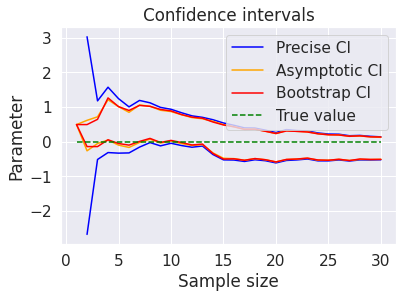

In [50]:
a = 0
sigma2 = 1

N = 30

X = np.random.normal(0,1, size=N)*np.sqrt(sigma2) + a

PCI = [] # Precise confidence interval
ACI = [] # Asymptotic confidence interval
BCI = [] # Bootstrap confidence interval

for n in range(1,N+1):
    PCI.append(get_PCI(X[:n]))
    ACI.append(get_ACI(X[:n]))
    BCI.append(get_BCI(X[:n]))

x = np.arange(1,N+1)
    
plt.plot(x, np.dstack(PCI)[0,0], color="blue", label="Precise CI")
plt.plot(x, np.dstack(PCI)[0,1], color="blue")

plt.plot(x, np.dstack(ACI)[0,0], color="orange", label="Asymptotic CI")
plt.plot(x, np.dstack(ACI)[0,1], color="orange")

plt.plot(x, np.dstack(BCI)[0,0], color="red", label="Bootstrap CI")
plt.plot(x, np.dstack(BCI)[0,1], color="red")


plt.plot(x, [a]*len(x), linestyle="dashed", color="green", label="True value")

plt.legend()
plt.title("Confidence intervals")
plt.xlabel("Sample size")
plt.ylabel("Parameter")

plt.show()

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

In [51]:
XX = np.random.normal(size=(1000, N))

def get_precision(XX, a, f):
    p = np.array([f(X) for X in XX])
    l, h = np.dstack(p)[0]
    
    return np.mean((l <= a) & (a <= h))

print("Computing PCI precision... ", end="")
p_PCI = get_precision(XX, a, get_PCI)
print("Done!")

print("Computing ACI precision... ",end="")
p_ACI = get_precision(XX, a, get_ACI)
print("Done!")

print("Computing BCI precision... ", end="")
p_BCI = get_precision(XX, a, get_BCI)
print("Done!")

Computing PCI precision... Done!
Computing ACI precision... Done!
Computing BCI precision... Done!


In [52]:
print("PCI precision: {:.2f}".format(p_PCI))
print("ACI precision: {:.2f}".format(p_ACI))
print("BCI precision: {:.2f}".format(p_BCI))

PCI precision: 0.95
ACI precision: 0.93
BCI precision: 0.94


In [53]:
%timeit get_PCI(X)

496 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [54]:
%timeit get_ACI(X)

525 µs ± 9.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
%timeit get_BCI(x)

1.95 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод: бутстрепный доверительный интервал, который непонятно как работает, оказался точнее, чем асимптотический на выборке из 30 элементов, но зато и работает он куда как дольше. С ростом числа элементов разница в качестве будет падать, зато разница в производительности, наоборот, будет расти. Так что лучше бутстрепить маленькие выборки и асимптотить большие.

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [56]:
## Часть 3. Case Study: Анализ динамики качества воздуха (2018-2020)

**Цель:** Оценить статистическую значимость изменений в уровне загрязнения (AQI) и применить непараметрические методы (Bootstrap) для построения доверительных интервалов.

## Часть 3. Case Study: Анализ динамики качества воздуха (2018-2020)

**Цель:** Оценить статистическую значимость изменений в уровне загрязнения (AQI) и применить непараметрические методы (Bootstrap) для построения доверительных интервалов.

In [57]:
df = pd.read_csv("./india/city_day.csv", parse_dates=[1])
df = df[["City", "Date", "AQI"]].dropna()
df.head()

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0


In [58]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day

df = df[(df.City == "Mumbai") | (df.City == "Kolkata")]
df = df[df.Date >= "2018-07-1"]
df = df[df.Date < "2020-07-1"]
df.head()

,City,Date,AQI,Month,Year,Day
19114,Kolkata,2018-07-01,58.0,7,2018,1
19115,Kolkata,2018-07-02,62.0,7,2018,2
19116,Kolkata,2018-07-03,50.0,7,2018,3
19117,Kolkata,2018-07-04,58.0,7,2018,4
19118,Kolkata,2018-07-05,57.0,7,2018,5


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

In [59]:
def get_BCI(X, alpha=0.95, n_samples=10000, f=np.mean):
    n = X.size
    L = np.random.choice(X, size=((n_samples, n)))
    
    m = f(L, axis=1)
    m.sort()
    
    return (m[int((1-alpha)*n_samples/2)], m[int((1+alpha)*n_samples/2)])

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [60]:
dfm = df[df.City == "Mumbai"]
dfk = df[df.City == "Kolkata"]

mon_df  = df.groupby(pd.Grouper(key='Date', freq='M'))
mon_dfm = dfm.groupby(pd.Grouper(key='Date', freq='M'))
mon_dfk = dfk.groupby(pd.Grouper(key='Date', freq='M'))

AQI   = [get_BCI(mon["AQI"]) for _,mon in mon_df]
AQI_m = [get_BCI(mon["AQI"]) for _,mon in mon_dfm]
AQI_k = [get_BCI(mon["AQI"]) for _,mon in mon_dfk]

mean_AQI  = [mon["AQI"].mean() for _,mon in mon_df]
mean_AQIm = [mon["AQI"].mean() for _,mon in mon_dfm]
mean_AQIk = [mon["AQI"].mean() for _,mon in mon_dfk]

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [61]:
l_AQI, r_AQI = np.dstack(AQI)[0]
l_AQI_m, r_AQI_m = np.dstack(AQI_m)[0]
l_AQI_k, r_AQI_k = np.dstack(AQI_k)[0]

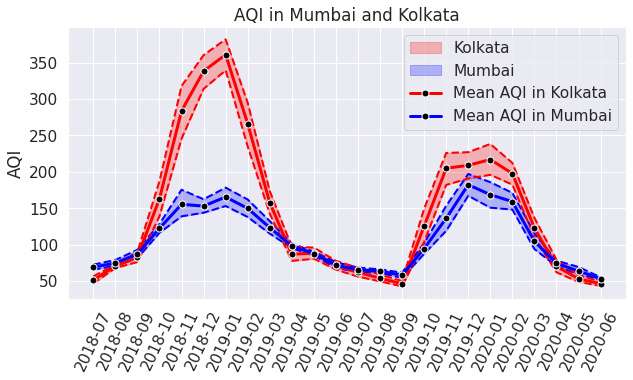

In [62]:
import datetime

m = [mon["Month"].unique()[0] for _,mon in mon_df]
y = [mon["Year"].unique()[0] for _,mon in mon_df]

x = ["{:4d}-{:02d}".format(year,month) for month, year in zip(m,y)]

plt.fill_between(x, l_AQI_k, r_AQI_k, color="red", alpha=0.25, label="Kolkata")
plt.fill_between(x, l_AQI_m, r_AQI_m, color="blue", alpha=0.25, label="Mumbai")

plt.plot(x, l_AQI_m, color="blue", linewidth="2", linestyle="dashed")
plt.plot(x, r_AQI_m, color="blue", linewidth="2", linestyle="dashed")

plt.plot(x, l_AQI_k, color="red", linewidth="2", linestyle="dashed")
plt.plot(x, r_AQI_k, color="red", linewidth="2", linestyle="dashed")

plt.plot(x, mean_AQIk, "-o", color="red", mec="white", mfc="black", ms=7, lw=3, label="Mean AQI in Kolkata")
plt.plot(x, mean_AQIm, "-o", color="blue", mec="white", mfc="black", ms=7, lw=3, label="Mean AQI in Mumbai")

plt.xticks(rotation = 65)
plt.ylabel("AQI")

plt.title("AQI in Mumbai and Kolkata")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

**Интерпретация сезонности:**
На графиках наблюдается выраженная сезонность. Пики загрязнения в зимне-весенний период в Индии часто коррелируют с метеорологическими условиями (температурные инверсии) и антропогенными факторами (сезонное сжигание стерни на полях). Анализ временных рядов позволяет выделить эти циклы для более точного сравнения периодов.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

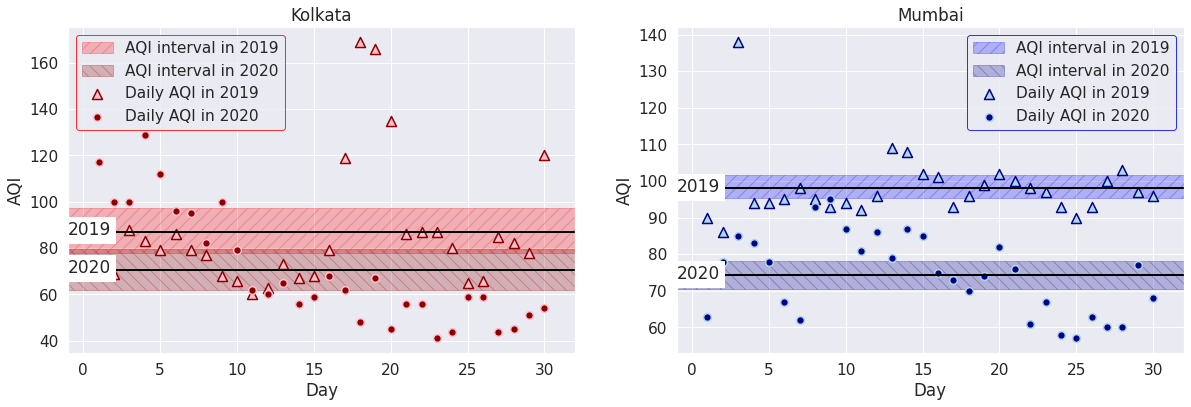

In [63]:
m_19 = dfm[(dfm.Year == 2019) & (dfm.Month == 4)]
m_20 = dfm[(dfm.Year == 2020) & (dfm.Month == 4)]

k_19 = dfk[(dfk.Year == 2019) & (dfk.Month == 4)]
k_20 = dfk[(dfk.Year == 2020) & (dfk.Month == 4)]

k_mean_19 = k_19["AQI"].mean()
k_mean_20 = k_20["AQI"].mean()

m_mean_19 = m_19["AQI"].mean()
m_mean_20 = m_20["AQI"].mean()


fig, ax = plt.subplots(1, 2, figsize=(20, 6))

IK_19 = get_BCI(k_19["AQI"])
IK_20 = get_BCI(k_20["AQI"])

IM_19 = get_BCI(m_19["AQI"])
IM_20 = get_BCI(m_20["AQI"])

ax[0].axhspan(*IK_19, alpha=0.25, color='red', hatch=r"//", label="AQI interval in 2019")
ax[0].axhspan(*IK_20, alpha=0.25, color='darkred', hatch=r"\\", label="AQI interval in 2020")

ax[0].hlines([k_mean_19], -1, 32, color="black", linewidth=2)
ax[0].text(-1, k_mean_19-1, "2019", fontsize=17, backgroundcolor='white')

ax[0].hlines([k_mean_20], -1, 32, color="black", linewidth=2)
ax[0].text(-1, k_mean_20-1, "2020", fontsize=17, backgroundcolor='white')

ax[0].scatter(k_19["Day"], k_19["AQI"], marker = "^", s=100, color="pink", edgecolor="darkred", linewidth=1.5,
              label="Daily AQI in 2019")
ax[0].scatter(k_20["Day"], k_20["AQI"], marker = "o", s=60, color="darkred", edgecolor="pink", linewidth=1.5,
              label="Daily AQI in 2020")

ax[0].set_xlim((-1, 32))

ax[0].legend()
ax[0].legend().get_frame().set_linewidth(2)
ax[0].legend().get_frame().set_edgecolor("red")

ax[0].set_xlabel("Day")
ax[0].set_ylabel("AQI")

ax[1].axhspan(*IM_19, alpha=0.25, color='blue', hatch=r"//", label="AQI interval in 2019")
ax[1].axhspan(*IM_20, alpha=0.25, color='darkblue', hatch=r"\\", label="AQI interval in 2020")

ax[1].hlines([m_mean_19], -0.6, 32, color="black", linewidth=2)
ax[1].text(-1, m_mean_19-1, "2019", fontsize=17, backgroundcolor='white')

ax[1].hlines([m_mean_20], -0.6, 32, color="black", linewidth=2)
ax[1].text(-1, m_mean_20-1, "2020", fontsize=17, backgroundcolor='white')

ax[1].scatter(m_19["Day"], m_19["AQI"], marker = "^", s=100, color="lightblue", edgecolor="darkblue", linewidth=1.5,
              label="Daily AQI in 2019")
ax[1].scatter(m_20["Day"], m_20["AQI"], marker = "o", s=60, color="darkblue", edgecolor="lightblue", linewidth=1.5,
              label="Daily AQI in 2020")

ax[1].set_xlim((-1, 32))


ax[1].legend()
ax[1].legend().get_frame().set_linewidth(2)
ax[1].legend().get_frame().set_edgecolor("blue")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("AQI")

ax[0].set_title("Kolkata")
ax[1].set_title("Mumbai")

plt.show()

### Итоговые выводы и продуктовая интерпретация

1. **Сравнение городов**: В Мумбаи наблюдается более стабильная динамика качества воздуха с меньшим количеством экстремальных выбросов по сравнению с Калькуттой. Это подтверждается более узкими доверительными интервалами.
2. **Оценка изменений (2019 vs 2020)**: Использование метода Bootstrap позволило статистически подтвердить значимое снижение AQI в апреле 2020 года. Несмотря на наличие выбросов в данных Калькутты, тренд на улучшение качества воздуха остается выраженным.
3. **Применимость в аналитике**: 
* Методы **робастной статистики** (медиана, усечение) необходимы при анализе денежных метрик (например, средний чек), где единичные крупные транзакции могут исказить результат.
* **Bootstrap** является универсальным инструментом для оценки доверительных интервалов продуктовых метрик, когда мы не можем гарантировать нормальность распределения (например, Retention или время сессии).